Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### Import Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans
from sklearn import cluster

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Set-up

In [5]:
# Seaborn plot style
sns.set_style('white')

# Color palette for plotting
colors = ["#e74c3c", "#34495e", "#2ecc71"]

# Clustering criterion/methods to use
criteria = ['none', 'ward', 'kmeans', 'single']

### Read data

In [3]:
# 1. Concentric circles
noisy_circles = pd.read_csv('https://www.dropbox.com/s/cgabfjzilc5hzcz/noisy_circles.csv?dl=1')

# 2. Interleaving half circles
noisy_moons = pd.read_csv('https://www.dropbox.com/s/t9dhhn3yuayfa7i/noisy_moons.csv?dl=1')

# 3. Blobs with varied variances
varied = pd.read_csv('https://www.dropbox.com/s/esgfpgjebb5fj9d/varied.csv?dl=1')

# 4. Anisotropicly distributed data
aniso = pd.read_csv('https://www.dropbox.com/s/2ei3rerl5kl2zt0/aniso.csv?dl=1')

# 5. Gaussian blobs
blobs = pd.read_csv('https://www.dropbox.com/s/dvxhka6v2n1jagv/blobs.csv?dl=1')

# 6. No structure
no_structure = pd.read_csv('https://www.dropbox.com/s/rbjmbwr6zovs12z/no_structure.csv?dl=1')

### Comparisons: Agglomerative Clustering vs. _k_-means

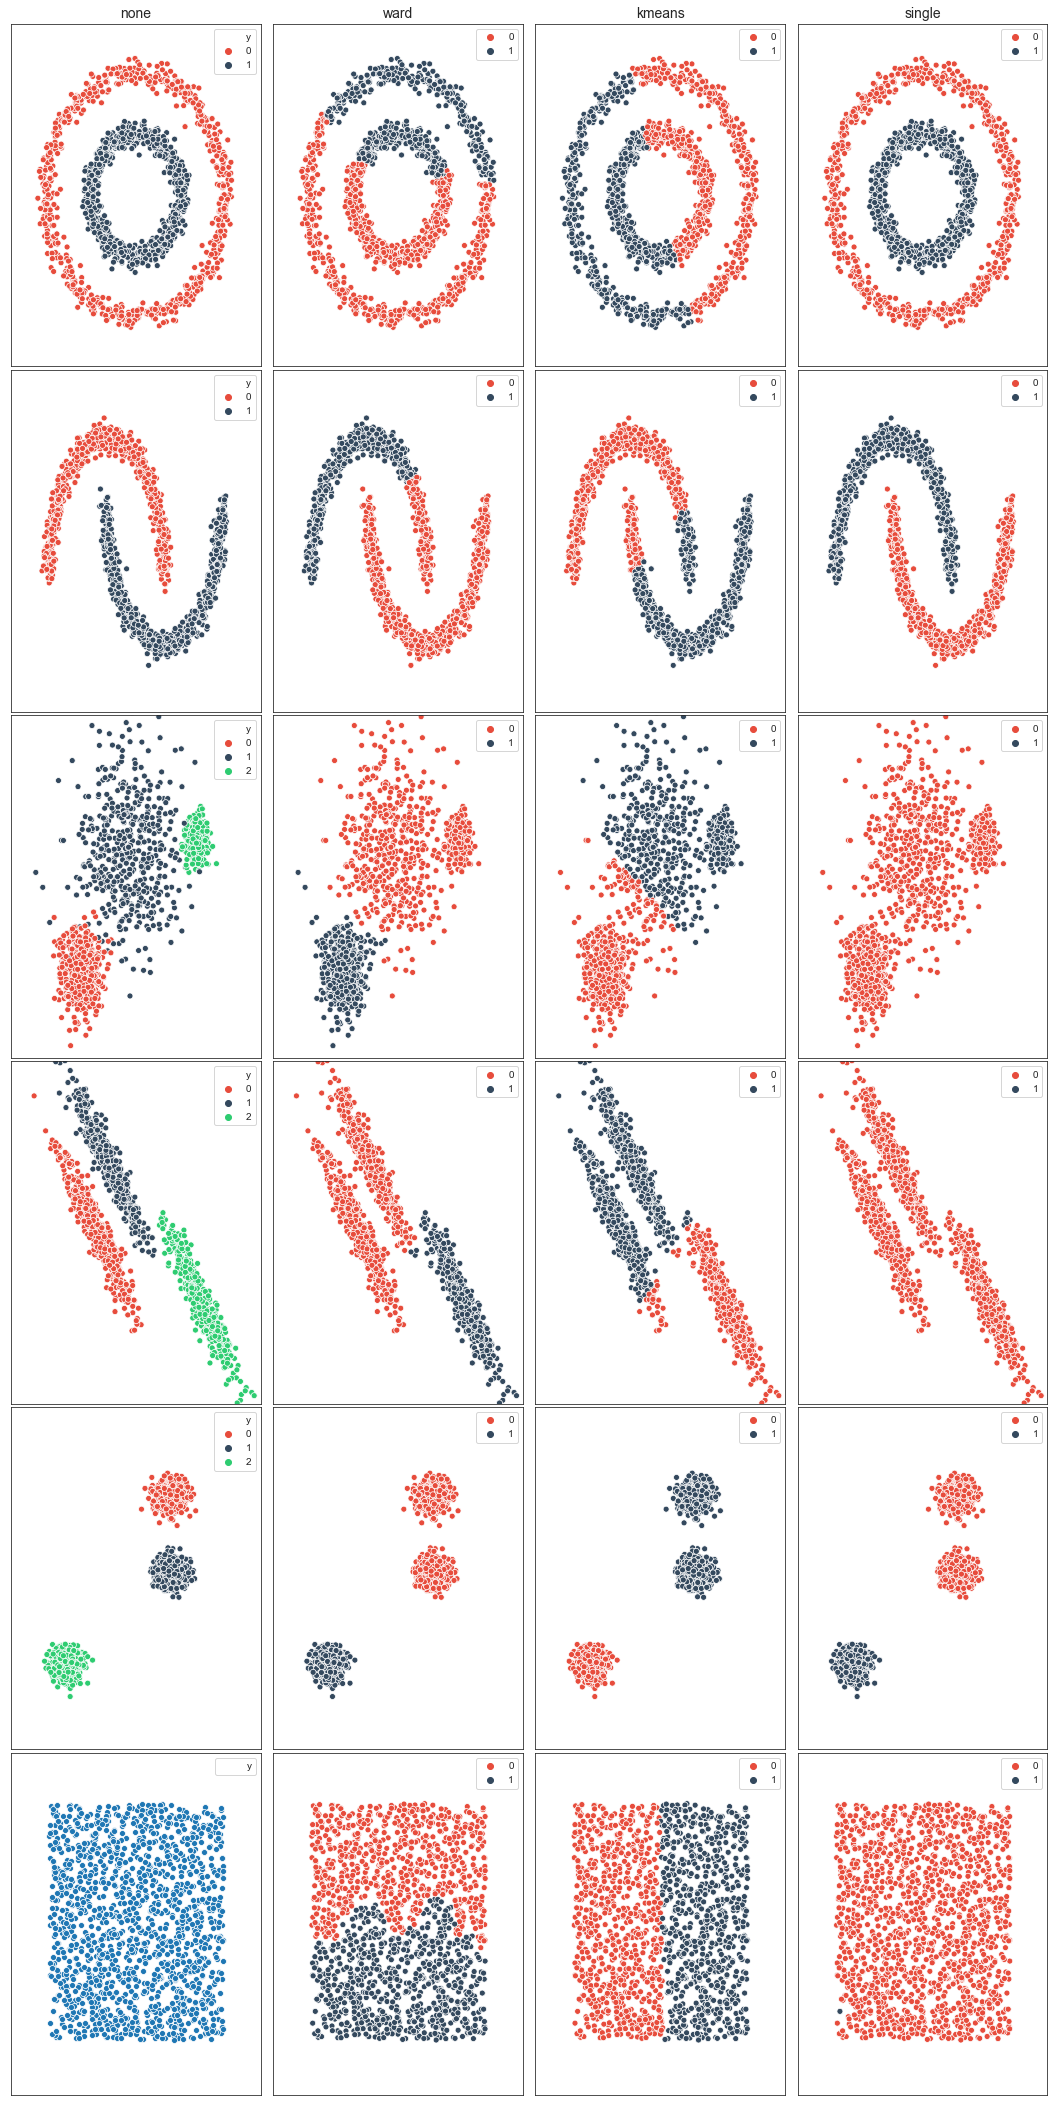

In [9]:
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

req_clus = 2

plt.figure(figsize=(15, 30))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1

for i, dataset in enumerate(datasets):
           
    X = StandardScaler().fit_transform(dataset[['X1', 'X2']])
    
    for criterion in criteria:

        plt.subplot(len(datasets), len(criteria), plot_num)
        
        if criterion == 'none':
                
            n_clus = dataset['y'].nunique()
            if i == 0:
                plt.title(criterion, size=14)
                
            sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dataset['y'], palette=colors[:n_clus])

        elif criterion == 'ward':
            agglomerative = cluster.AgglomerativeClustering(n_clusters=req_clus, linkage=criterion).fit(X)
            y_pred = agglomerative.labels_.astype(np.int)
            n_pred_clus = len(np.unique(y_pred))
            if i == 0:
                plt.title(criterion, size=14)
                
            sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette=colors[:n_pred_clus])
            
        elif criterion == 'kmeans':
            y_pred = cluster.KMeans(n_clusters=req_clus, random_state=314).fit_predict(X)
            n_pred_clus = len(np.unique(y_pred))
            if i == 0:
                plt.title(criterion, size=14)
                
            sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette=colors[:n_pred_clus])
            
        elif criterion == 'single':
            y_pred = cluster.AgglomerativeClustering(n_clusters=req_clus, linkage=criterion).fit_predict(X)
            n_pred_clus = len(np.unique(y_pred))
            if i == 0:
                plt.title(criterion, size=14)
                
            sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette=colors[:n_pred_clus])
            
        else:
            print ('Invalid clustering criterion/method specified.')
            
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        
        plot_num += 1
    
plt.show()